Step 1: Read in and merge the data

In [1]:
import pandas as pd

# Load datasets
counties_df = pd.read_csv("CMU-MS-DAS-Vis-S25/data/california_counties.tsv", sep="\t")
covid_offsets_df = pd.read_csv("CMU-MS-DAS-Vis-S25/data/covid_surge_offsets.tsv", sep="\t")

# Merge datasets
merged_df = pd.merge(covid_offsets_df, counties_df, left_on="area", right_on="name")


Step 2: Add a population density column

In [3]:
merged_df["population_density"] = merged_df["population_2020"] / merged_df["area_sq_miles"]


Step 3: Create a scatterplot with Seaborn

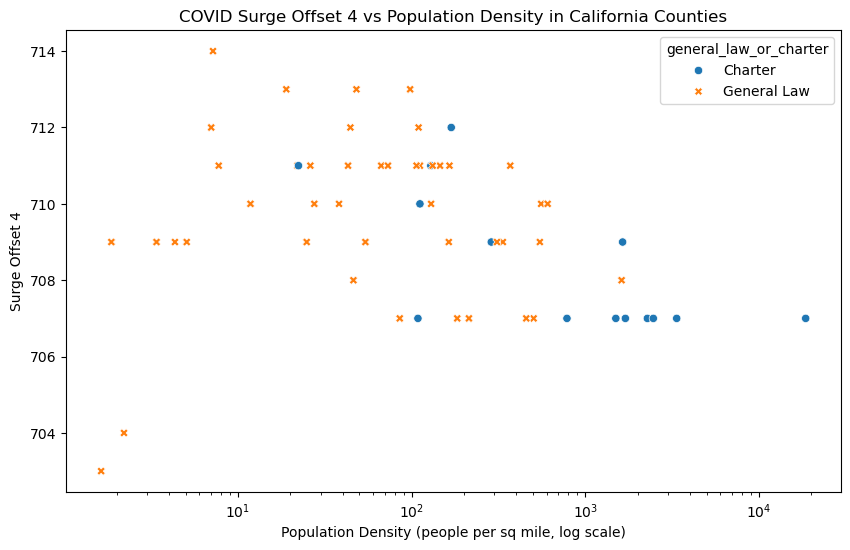

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x="population_density",
    y="surge_4_offset",
    hue="general_law_or_charter",
    style="general_law_or_charter"
)

# Set log scale for x-axis
plt.xscale("log")

# Labeling
plt.xlabel("Population Density (people per sq mile, log scale)")
plt.ylabel("Surge Offset 4")
plt.title("COVID Surge Offset 4 vs Population Density in California Counties")

# Show the plot
plt.show()
